In [5]:
import pandas as pd
import os
import numpy as np

import seaborn as sns; sns.set()
sns.set_style("ticks")
import matplotlib.pyplot as plt

custom_palette = ["red", "green", "orange", "blue", "black"]
sns.set_palette(custom_palette)

calib_method = 'logx_logreg'


args = {'cohort_path': '/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts/cohort/all_cohorts.csv',
        'base_path': '/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts',
        'plot_path': os.path.join('/labs/shahlab/projects/agataf/fairness_utility/eval_manuscript/plots', 'paper_plots'),
        'eval_fold':  'eval',
        'grp_label_dict': {1: 'Black women', 2: 'White women', 3: 'Black men', 4: 'White men', 'overall': 'Overall'} 
       }
os.makedirs(args['plot_path'], exist_ok=True)

save_plots=True

In [29]:
aggregate_path_all = '/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts/experiments/bmj_manuscript/'

plot_df_all = pd.read_csv(os.path.join(aggregate_path_all, 'bootstrap_standard_eval_new.csv'))

In [32]:
plot_df_all

,phase,model_type,group,metric,CI_lower,CI_med,CI_upper,thresholds
0,test,NaN,1,NaN,0.031760,0.044184,0.063202,NaN
1,test,NaN,1,ace,0.013215,0.023017,0.043756,NaN
2,test,NaN,1,auc,0.778880,0.842457,0.897433,NaN
3,test,NaN,1,auprc,0.188091,0.300624,0.463711,NaN
4,test,NaN,1,loss,0.164206,0.180259,0.195628,NaN
...,...,...,...,...,...,...,...,...
435,test,rPCE,overall,impl_threshold,0.192722,0.212410,0.235755,0.200
436,test,rPCE,overall,sensitivity,0.690307,0.746874,0.807074,0.075
437,test,rPCE,overall,sensitivity,0.196177,0.258163,0.324732,0.200
438,test,rPCE,overall,specificity,0.708194,0.724964,0.741756,0.075


In [7]:
metric_names = {'auc':                    'AUC', 
                'auprc':                  'AUPRC',
                'ace_rmse_logistic_log':  'ACE',
                'loss_bce':               'loss',
                'sensitivity':           'Sensitivity',
                'specificity':           'Specificity',
                'impl_threshold': 'Implied threshold',
                'impl_threshold threshold': 'Implied threshold',
                
               }

group_names = {'overall': 'overall',
               '1': 'Black Women', 
               '2': 'White Women', 
               '3': 'Black Men', 
               '4': 'White Men'
              }


plot_df = (plot_df_all.assign(metric = lambda x: x.metric.map(metric_names),
                              group = lambda x: x.group.map(group_names))
           .query("model_type != ['EO1', 'EO2', 'EO4']")
           .replace({'EO3': 'EO'})
           .assign(model_type = lambda x: pd.Categorical(x.model_type, 
                                                         categories=['PCE', 'rPCE', 'BL', 'rBL', 'EO'],
                                                         ordered=True))
          )

In [8]:
plot_df

,phase,model_type,group,metric,CI_lower,CI_med,CI_upper,thresholds
80,test,EO,Black Women,AUC,0.776244,0.839691,0.896075,NaN
81,test,EO,Black Women,AUPRC,0.166852,0.291866,0.453957,NaN
82,test,EO,Black Women,Implied threshold,0.012305,0.028147,0.044098,0.075
83,test,EO,Black Women,Implied threshold,0.260076,0.424987,0.624644,0.200
84,test,EO,Black Women,Sensitivity,0.727859,0.899129,1.000000,0.075
...,...,...,...,...,...,...,...,...
315,test,rPCE,overall,Implied threshold,0.193913,0.212018,0.234159,0.200
316,test,rPCE,overall,Sensitivity,0.686246,0.748802,0.808279,0.075
317,test,rPCE,overall,Sensitivity,0.196179,0.256634,0.322879,0.200
318,test,rPCE,overall,Specificity,0.706874,0.724595,0.740462,0.075


In [13]:
to_plot

,phase,model_type,group,metric,CI_lower,CI_med,CI_upper,thresholds
84,test,EO,Black Women,Sensitivity,0.727859,0.899129,1.000000,0.075
92,test,EO,White Women,Sensitivity,0.813859,0.917371,1.000000,0.075
100,test,EO,Black Men,Sensitivity,0.743310,0.903388,1.000000,0.075
108,test,EO,White Men,Sensitivity,0.792838,0.889175,0.972540,0.075
116,test,EO,overall,Sensitivity,0.824333,0.889747,0.977894,0.075
164,test,BL,Black Women,Sensitivity,0.653769,0.794652,0.932574,0.075
172,test,BL,White Women,Sensitivity,0.687766,0.812450,0.916959,0.075
180,test,BL,Black Men,Sensitivity,0.648727,0.809526,0.935933,0.075
188,test,BL,White Men,Sensitivity,0.766327,0.849672,0.931140,0.075
196,test,BL,overall,Sensitivity,0.767304,0.823074,0.874361,0.075


AttributeError: 'AxesSubplot' object has no attribute 'map'

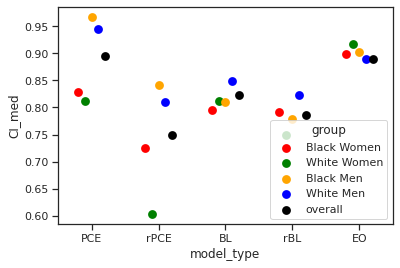

In [20]:
g=sns.pointplot(x="model_type", y="CI_med", hue="group", join=False,
             # yerr=["CI_lower", "CI_upper"],
                   data=to_plot, dodge=0.4, legend=False)
g.map(plt.axvline, "model_type", "CI_lower", "CI_upper")

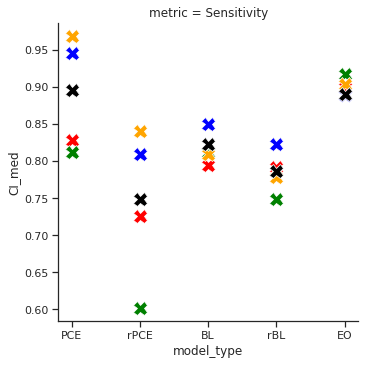

In [28]:
g=sns.relplot(data = to_plot,
                x = 'model_type',
                y = 'CI_med',
                col='metric',
                kind = 'line',
                palette = custom_palette, 
                hue='group',
                #err_style="bars",
                facet_kws= {'sharey': False, 'margin_titles': True},
                #err_kws = {'capsize': 5},
                legend=False,
                aspect=1,
              marker='X',
              markersize=14,
                linestyle='',
             #dodge=True
             )
#g.map(plt.axvline, "model_type", "CI_lower", "CI_upper")

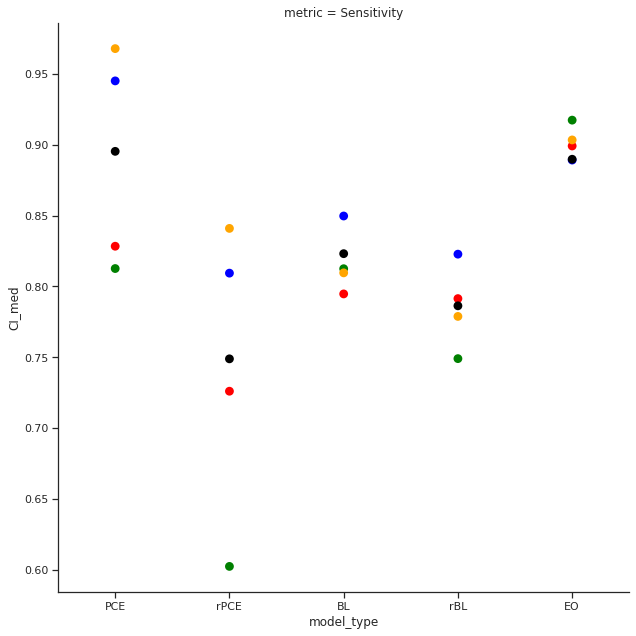

In [16]:
to_plot = (plot_df.query("(metric == 'Sensitivity') & (thresholds == 0.075)")
          )
g = sns.FacetGrid(to_plot, hue="group", col="metric", height=9,
                 palette = custom_palette)

#g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "model_type", "CI_med", order = ['PCE', 'rPCE', 'BL', 'rBL', 'EO'], join=False, dodge=True)

#g.map(plt.axvline, "model_type", "CI_lower", "CI_upper")

#fig, ax = plt.subplots()
#ax.errorbar(x=to_plot.model_type, y=to_plot.CI_med, yerr=[to_plot.CI_lower, to_plot.CI_upper], fmt='x')

# g=sns.pointplot(x="model_type", y="CI_med", hue="group", join=False,
#              # yerr=["CI_lower", "CI_upper"],
#                    data=to_plot, dodge=0.4, legend=False)

#g.map(plt.errorbar, "model_type", "CI_med", "CI_lower", marker="o")

In [ ]:
sns.set(font_scale=1.7)
sns.set_style("ticks")

to_plot = (plot_df
           .query("(metric == 'Sensitivity') & (thresholds == 0.075)")
#            .assign(metric = pd.Categorical(to_plot.metric, 
#                                            categories=['Sensitivity'],
#                                            ordered=True)
                  #)
          )



g=sns.relplot(data = to_plot,
                x = 'model_type',
                y = 'CI_med',
                col='metric',
                kind = 'line',
                palette = custom_palette, 
                hue='group',
                #err_style="bars",
                facet_kws= {'sharey': False, 'margin_titles': True},
                #err_kws = {'capsize': 5},
                legend=False,
                aspect=1,
              marker='X',
              markersize=14,
                linestyle='')



#fig, ax = plt.subplots()
#ax.errorbar(x=to_plot.model_type, y=to_plot.CI_med, yerr=[to_plot.CI_lower, to_plot.CI_upper], fmt='x')

# g=sns.pointplot(x="model_type", y="CI_med", hue="group", join=False,
#              # yerr=["CI_lower", "CI_upper"],
#                    data=to_plot, dodge=0.4, legend=False)

g.map(plt.errorbar, "model_type", "CI_med", "CI_lower", marker="o")

#asymmetric_error = to_plot.set_index(['group', 'model_type']).filter(['CI_lower', 'CI_upper'])
#axes = g.axes.flatten()
#g.errorbar(x=to_plot.model_type, y=to_plot.CI_med, yerr=[to_plot.CI_lower, to_plot.CI_upper], fmt='x')

In [ ]:
to_plot

In [ ]:
to_plot.set_index(['group', 'model_type'])

In [ ]:
to_plot.pivot(index=['group', 'model_type'], columns = 'phase')#,values=['metric', 'CI_lower', 'CI_med', 'CI_upper', 'thresholds'])

In [ ]:
to_plot.groupby(['group', 'model_type']).agg(['sum'])

In [ ]:
sns.set(font_scale=1.7)
sns.set_style("ticks")

to_plot = (plot_df
           .query("metric == [ 'Sensitivity', 'Specificity', 'Implied threshold']")
           .assign(metric = pd.Categorical(to_plot.metric, 
                                           categories=['Sensitivity', 'Specificity', 'Implied threshold'],
                                           ordered=True)
                  )
          )

g=sns.relplot(data = to_plot,
                x = 'model_type',
                y = 'CI_med',
                col='metric',
                row='thresholds',
                kind = 'line',
                palette = custom_palette, 
                hue='group',
                #err_style="bars",
                facet_kws= {'sharey': False, 'margin_titles': True},
                #err_kws = {'capsize': 5},
                legend=False,
                aspect=1,
              marker='X',
              markersize=14,
                linestyle='')
(g.set_xlabels('')
 .set_ylabels('')
 .set_titles(row_template="", col_template="{col_name}")
 .set_yticklabels()
 .set_xticklabels(rotation=45)
)

plt.legend(title='Group', labels=['Black Women', 'White Women', 'Black Men', 'White Men'],
           bbox_to_anchor=(-0.5,-.3)) 

sns.set(font_scale=1)
axes = g.axes.flatten()
axes[2].axhline(0.075, ls='--', linewidth=3, color='grey')
axes[5].axhline(0.2, ls='--', linewidth=3, color='grey')

# if save_plots:
#     output_path = os.path.join(args['plot_path'], 'discr_calib_2.png')
#     g.savefig(output_path)



In [ ]:
sns.set(font_scale=1.7)
sns.set_style("ticks")

to_plot = plot_df.query("metric == ['AUC', 'Sensitivity (t=7.5%)', 'Specificity (t=7.5%)', 'Implied threshold (t=7.5%)']")
to_plot = to_plot.assign(metric = pd.Categorical(to_plot.metric, 
                      categories=['AUC', 'Sensitivity (t=7.5%)', 'Specificity (t=7.5%)', 'Implied threshold (t=7.5%)'],
                      ordered=True)
                        )
#to_plot = to_plot.query("model_type != ['EO1', 'EO2', 'EO4']").rename(columns={'EO3': 'EO'})

g=sns.relplot(data = to_plot,
                x = 'model_type',
                y = 'CI_med',
                col='metric',
                #row='y_axis',
                kind = 'line',
                palette = custom_palette, 
                hue='group',
                #err_style="bars",
                facet_kws= {'sharey': False, 'margin_titles': True},
                #err_kws = {'capsize': 5},
                legend=False,
                aspect=1,
              marker='X',
              markersize=14,
                linestyle='')
(g.set_xlabels('')
 .set_ylabels('')
 .set_titles(row_template="", col_template="{col_name}")
 .set_yticklabels()
 .set_xticklabels(rotation=45)
)

# plt.legend(title='Group', labels=['Black Women', 'White Women', 'Black Men', 'White Men'],
#            bbox_to_anchor=(-0.5,-.3)) 

sns.set(font_scale=1)
axes = g.axes.flatten()
axes[-1].axhline(0.075, ls='--', linewidth=3, color='grey')

# if save_plots:
#     output_path = os.path.join(args['plot_path'], 'discr_calib_2.png')
#     g.savefig(output_path)



In [ ]:
sns.set(font_scale=1.7)
sns.set_style("ticks")

#g=sns.relplot(data = plot_df.query("metric == ['AUPRC', 'sensitivity (t=20%)', 'specificity (t=20%)', 'observation rate (t=20%)']"),
to_plot = plot_df.query("metric == ['AUPRC', 'Sensitivity (t=20%)', 'Specificity (t=20%)', 'Implied threshold (t=20%)']")
to_plot = to_plot.assign(metric = pd.Categorical(to_plot.metric, 
                      categories=['AUPRC', 'Sensitivity (t=20%)', 'Specificity (t=20%)', 'Implied threshold (t=20%)'],
                      ordered=True)
                        )

g=sns.relplot(data = to_plot,               
              x = 'model_type',
              y = 'CI_med',
              col='metric',
            #row='y_axis',
              kind = 'line',
              palette = custom_palette, 
              hue='group',
              #err_style="bars",
              facet_kws= {'sharey': False, 'margin_titles': True},
              #err_kws = {'capsize': 5},
              legend=False,
              aspect=1,
              marker='X',
              markersize=14,
              linestyle='')
(g.set_xlabels('')
 .set_ylabels('')
 .set_titles(row_template="", col_template="{col_name}")
 .set_yticklabels()
 .set_xticklabels(rotation=45)
)

plt.legend(title='Group', labels=args['grp_label_dict'].values(),
           bbox_to_anchor=(-1,-.3)) #bbox_to_anchor=(1, 1))

#plt.legend(bbox_to_anchor=(-1.3,-.3)) 

sns.set(font_scale=1)
axes = g.axes.flatten()
axes[-1].axhline(0.2, ls='--', linewidth=3, color='grey')


if save_plots:
    output_path = os.path.join(args['plot_path'], 'discr_calib_2.png')
    g.savefig(output_path)


In [ ]:
(plot_df
 .query("(phase=='test') ")
 .drop(columns=['model_id', 'phase', 'CI_lower', 'CI_upper'])
 .pivot(index=['metric', 'group'], columns=['model_type'], values='CI_med')
 .tail(30)
)

In [ ]:
(plot_df
 .query("(phase=='test') & (metric=='AUPRC') ")
 .drop(columns=['model_id', 'phase', 'CI_lower', 'CI_upper'])
 .groupby(['metric', 'model_type', 'group']).sum()
 .head(30)
)

In [ ]:
plot_df1 = plot_df.assign(value = lambda x: x.CI_med.round(3).astype(str) + 
               ' (' + x.CI_lower.round(3).astype(str)+', ' + 
               x.CI_upper.round(3).astype(str) + ')')


a=(plot_df1
 .query("phase=='test'")
 .drop(columns=['model_id', 'phase', 'CI_lower', 'CI_med', 'CI_upper'])
 .pivot(index=['metric', 'group'], columns='model_type')
 
)

a.head(50)